In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [29]:
# Get stock indices data from yahoo finance (2000/01/01 to 2022/12/31)
'''US: S&P500
China: SSE Composite Index
Japan: Nikkei 225
Hong Kong: HANG SENG INDEX
India: NIFTY 50
'''
start_date = '1980-01-01'
end_date = '2022-12-31'
stock_indices = ['^GSPC', '000001.SS', '^N225', '^HSI', '^NSEI']
stock_indices_data = yf.download(stock_indices, start=start_date, end=end_date)['Adj Close'].reset_index()
stock_indices_data.describe()


[*********************100%%**********************]  5 of 5 completed


Ticker,Date,000001.SS,^GSPC,^HSI,^N225,^NSEI
count,11186,6179.000000,10843.000000,8891.000000,10579.000000,3747.000000
mean,2001-07-04 01:16:58.916502784,2443.958402,1198.676045,15525.275221,16689.316270,8658.315827
min,1980-01-02 00:00:00,1011.499023,98.220001,1894.900024,6475.930176,2524.199951
25%,1990-10-03 06:00:00,1623.882019,348.979996,9418.750000,10739.679688,5436.350098
50%,2001-07-04 12:00:00,2376.839111,1084.530029,14984.400391,16412.210938,7964.799805
75%,2012-04-03 18:00:00,3111.499512,1470.705017,22641.329102,20725.605469,10859.300293
max,2022-12-30 00:00:00,6092.057129,4796.560059,33154.121094,38915.871094,18812.500000
std,NaN,918.164694,1033.730664,8112.920259,6766.877810,3965.463346


In [71]:
for index in stock_indices:
    print(f'{index} first valid index: {stock_indices_data[index].first_valid_index()}')

^GSPC first valid index: 0
000001.SS first valid index: 4550
^N225 first valid index: 2
^HSI first valid index: 1820
^NSEI first valid index: 7205


In [74]:
print(stock_indices_data.iloc[[0]]['Date'])
print(stock_indices_data.iloc[[4550]]['Date'])
print(stock_indices_data.iloc[[2]]['Date'])
print(stock_indices_data.iloc[[1820]]['Date'])
print(stock_indices_data.iloc[[7205]]['Date'])

0   1980-01-02
Name: Date, dtype: datetime64[ns]
4550   1997-07-02
Name: Date, dtype: datetime64[ns]
2   1980-01-04
Name: Date, dtype: datetime64[ns]
1820   1986-12-31
Name: Date, dtype: datetime64[ns]
7205   2007-09-17
Name: Date, dtype: datetime64[ns]


In [30]:
# calculate the daily log return of stock indices
stock_indices_return = stock_indices_data.copy()
for index in stock_indices:
    stock_indices_return[index] = np.log(stock_indices_return[index] / stock_indices_return[index].shift(1))
# stock_indices_return = stock_indices_return.dropna()

# group the data by year and calculate the annual return
stock_indices_return['Year'] = stock_indices_return['Date'].dt.year
stock_indices_annual_return = pd.DataFrame()
for index in stock_indices:
    stock_indices_annual_return[index] = stock_indices_return.groupby('Year')[index].sum()
stock_indices_annual_return = stock_indices_annual_return.reset_index()
stock_indices_annual_return = stock_indices_annual_return[['Year', '^GSPC', '000001.SS', '^N225', '^HSI', '^NSEI']]
stock_indices_annual_return

,Year,^GSPC,000001.SS,^N225,^HSI,^NSEI
0,1980,0.225864,0.000000,0.078205,0.000000,0.000000
1,1981,-0.104004,0.000000,0.101944,0.000000,0.000000
2,1982,0.133431,0.000000,0.014102,0.000000,0.000000
3,1983,0.172865,0.000000,0.199617,0.000000,0.000000
4,1984,0.041748,0.000000,0.137549,0.000000,0.000000
5,1985,0.236402,0.000000,0.091411,0.000000,0.000000
6,1986,0.156909,0.000000,0.356901,0.000000,0.000000
7,1987,0.031892,0.000000,0.089601,0.329426,0.000000
8,1988,0.076810,0.000000,0.328290,0.124826,0.000000
9,1989,0.240718,0.000000,0.259039,-0.009375,0.000000


In [62]:
df_cp = stock_indices_data.copy()
df_cp['Year'] = df_cp['Date'].dt.year
stock_indices_mean = pd.DataFrame()
for index in stock_indices:
    stock_indices_mean[index] = df_cp.groupby('Year')[index].mean()
stock_indices_mean = stock_indices_mean.reset_index()
stock_indices_mean = stock_indices_mean[['Year', '^GSPC', '000001.SS', '^N225', '^HSI', '^NSEI']]
stock_indices_mean

,Year,^GSPC,000001.SS,^N225,^HSI,^NSEI
0,1980,118.710118,NaN,6868.286545,NaN,NaN
1,1981,128.037905,NaN,7516.848707,NaN,NaN
2,1982,119.705732,NaN,7387.732454,NaN,NaN
3,1983,160.473122,NaN,8806.450587,NaN,NaN
4,1984,160.463557,NaN,10564.541401,NaN,NaN
5,1985,186.828174,NaN,12561.648497,NaN,NaN
6,1986,236.390474,NaN,16425.400434,2568.300049,NaN
7,1987,286.998024,NaN,23232.155815,2908.023981,NaN
8,1988,265.880158,NaN,27033.587248,2555.631046,NaN
9,1989,323.051429,NaN,34068.409014,2792.818288,NaN


In [4]:
gdp_data = pd.read_csv('WEOOct2023all.csv')

In [14]:
gdp_data[gdp_data['country'] == 'United States']['Gross domestic product, current prices.1']

9114     2857.33
9115     3207.03
9116     3343.80
9117     3634.03
9118     4037.65
9119     4339.00
9120     4579.63
9121     4855.25
9122     5236.43
9123     5641.60
9124     5963.13
9125     6158.13
9126     6520.33
9127     6858.55
9128     7287.25
9129     7639.75
9130     8073.13
9131     8577.55
9132     9062.83
9133     9631.18
9134    10250.95
9135    10581.93
9136    10929.10
9137    11456.45
9138    12217.18
9139    13039.20
9140    13815.60
9141    14474.25
9142    14769.85
9143    14478.05
9144    15048.98
9145    15599.73
9146    16253.95
9147    16843.23
9148    17550.68
9149    18206.03
9150    18695.10
9151    19477.35
9152    20533.08
9153    21380.95
9154    21060.45
9155    23315.08
9156    25462.73
9157    26949.64
9158    27966.55
9159    29048.89
9160    30223.88
9161    31428.87
9162    32690.37
Name: Gross domestic product, current prices.1, dtype: float64

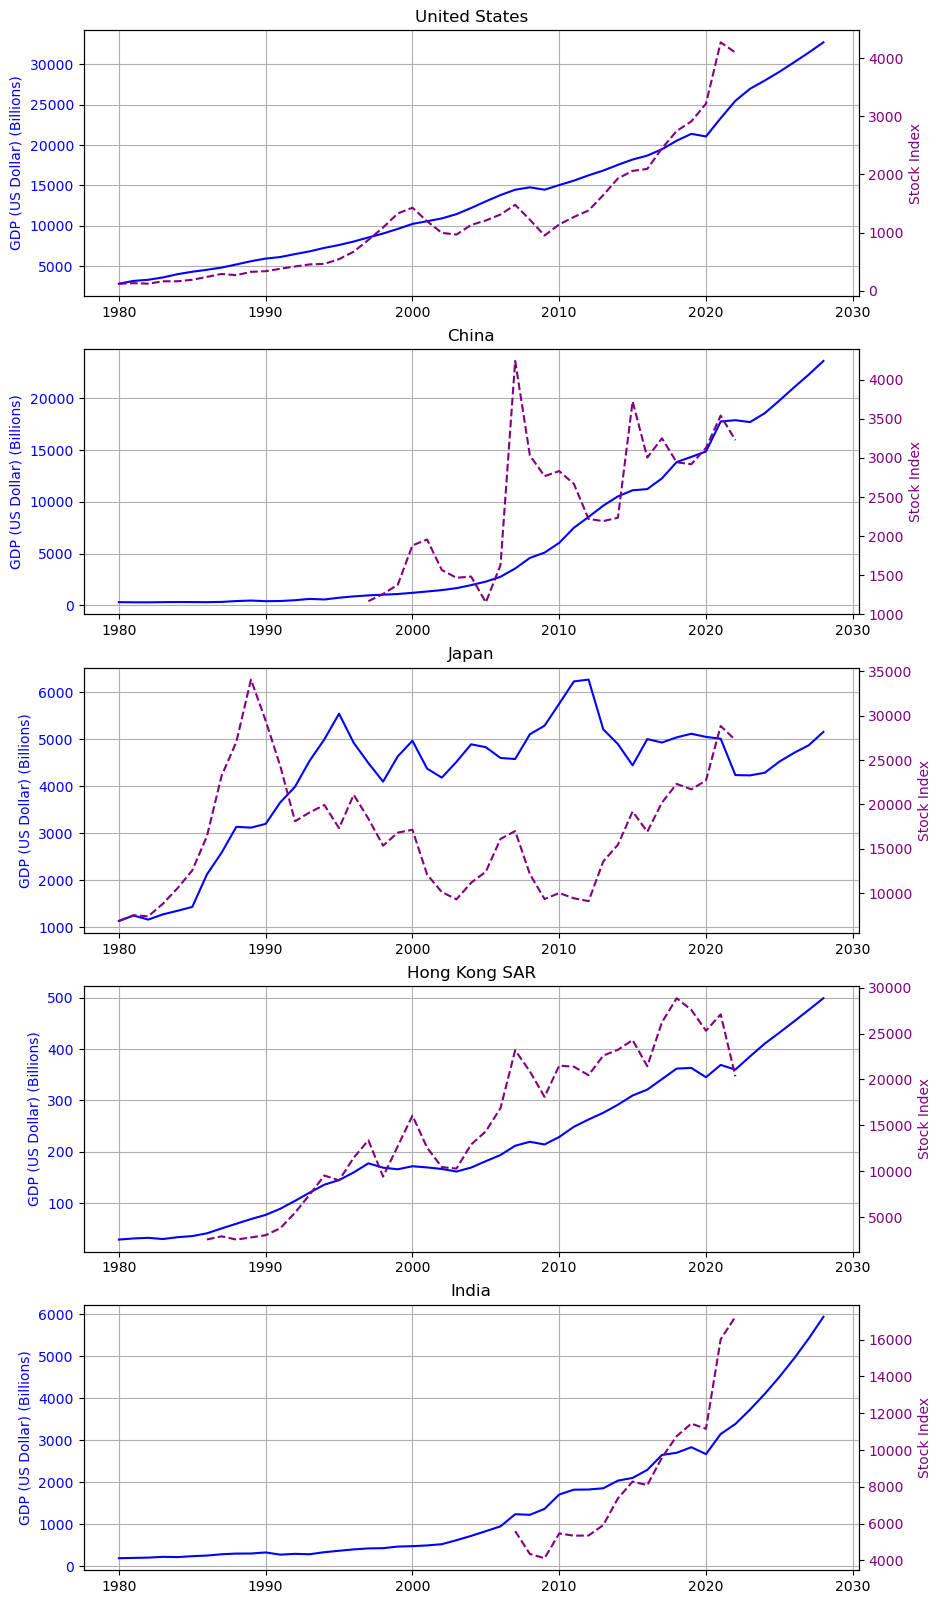

In [65]:
# plot GDP for United States, China, Japan, Hong Kong, India
''''Gross domestic product, current prices.1' is the GDP column in gdp_data'''

countries = ['United States', 'China', 'Japan', 'Hong Kong SAR', 'India']

figure, axis = plt.subplots(5, 1)
figure.set_figheight(20)
figure.set_figwidth(10)
for i in range(5):
    axis[i].plot(gdp_data[gdp_data['country'] == countries[i]]['year'], gdp_data[gdp_data['country'] == countries[i]]['Gross domestic product, current prices.1'], color='blue')
    axis[i].tick_params(axis='y', labelcolor='blue')

    ax2 = axis[i].twinx()
    # ax2.plot(stock_indices_annual_return['Year'], (np.exp(stock_indices_annual_return[stock_indices[i]]) - 1) * 100, linestyle='--', color='purple')
    ax2.plot(stock_indices_mean['Year'], stock_indices_mean[stock_indices[i]], linestyle='--', color='purple')
    ax2.tick_params(axis='y', labelcolor='purple')
    # ax2.set_ylabel('Stock Annual Return (%)', color='purple')
    ax2.set_ylabel('Stock Index', color='purple')

    axis[i].set_title(countries[i])
    # axis[i].set_xlabel('Year')
    axis[i].set_ylabel('GDP (US Dollar) (Billions)', color='blue')
    axis[i].grid(True)

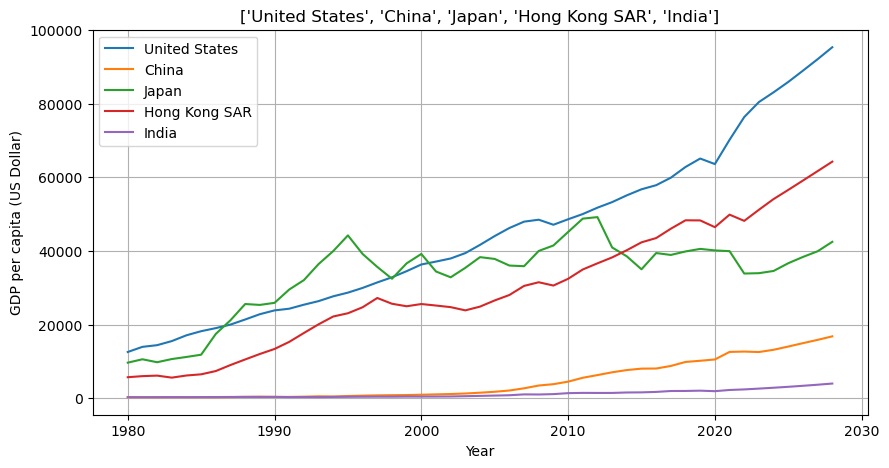

In [58]:
# plot GDP per capita for United States, China, Japan, Hong Kong, India
'''Gross domestic product per capita, current prices.1' is the GDP per capita column in gdp_data'''
figure, axis = plt.subplots()
figure.set_figheight(5)
figure.set_figwidth(10)

for i in range(5):
    axis.plot(gdp_data[gdp_data['country'] == countries[i]]['year'], gdp_data[gdp_data['country'] == countries[i]]['Gross domestic product per capita, current prices.1'])
axis.set_title(countries)
axis.set_xlabel('Year')
axis.set_ylabel('GDP per capita (US Dollar)')
axis.grid(True)
axis.legend(countries)